In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [5]:
# Carregar dados
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['diagnosis'] = df['target'].map({0: 'Maligno', 1: 'Benigno'})

# Preparar dados para clustering
features_clustering = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
X_cluster = df[features_clustering]

print("🔍 Características selecionadas para clustering:")
print(X_cluster.describe())


🔍 Características selecionadas para clustering:
       mean radius  mean texture  mean perimeter    mean area
count   569.000000    569.000000      569.000000   569.000000
mean     14.127292     19.289649       91.969033   654.889104
std       3.524049      4.301036       24.298981   351.914129
min       6.981000      9.710000       43.790000   143.500000
25%      11.700000     16.170000       75.170000   420.300000
50%      13.370000     18.840000       86.240000   551.100000
75%      15.780000     21.800000      104.100000   782.700000
max      28.110000     39.280000      188.500000  2501.000000


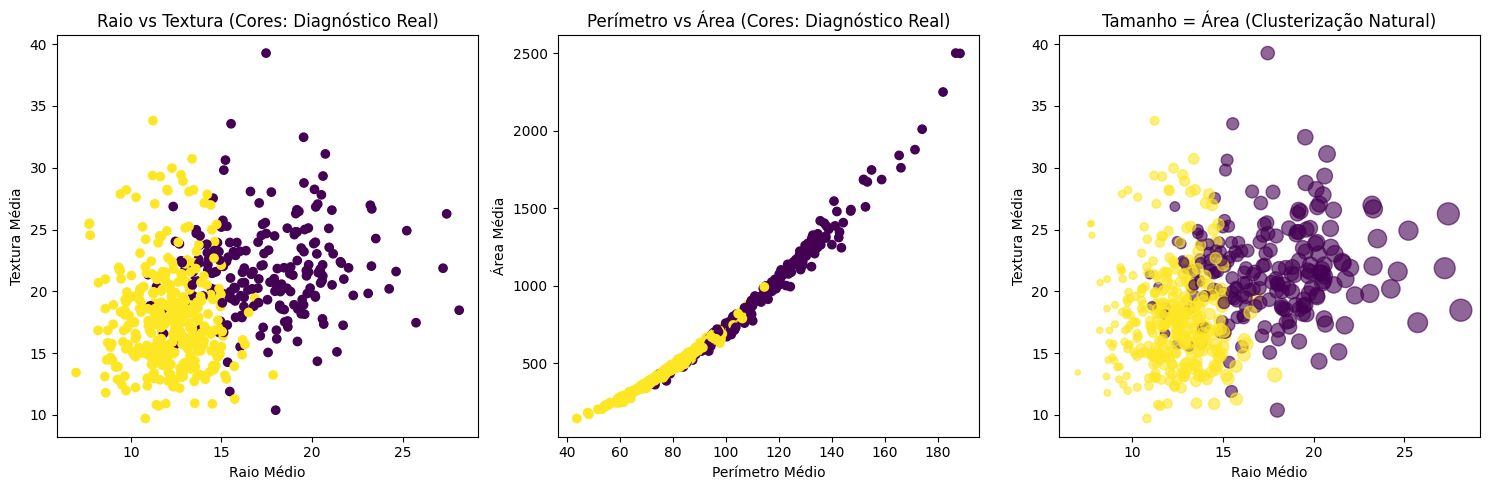

In [6]:
# Visualização pré-clustering
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['mean radius'], df['mean texture'], c=df['target'], cmap='viridis')
plt.xlabel('Raio Médio')
plt.ylabel('Textura Média')
plt.title('Raio vs Textura (Cores: Diagnóstico Real)')

plt.subplot(1, 3, 2)
plt.scatter(df['mean perimeter'], df['mean area'], c=df['target'], cmap='viridis')
plt.xlabel('Perímetro Médio')
plt.ylabel('Área Média')
plt.title('Perímetro vs Área (Cores: Diagnóstico Real)')

plt.subplot(1, 3, 3)
# Relação 3D simplificada
scatter = plt.scatter(df['mean radius'], df['mean texture'], 
                     s=df['mean area']/10, c=df['target'], cmap='viridis', alpha=0.6)
plt.xlabel('Raio Médio')
plt.ylabel('Textura Média')
plt.title('Tamanho = Área (Clusterização Natural)')

plt.tight_layout()
plt.show()